In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Input

In [2]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")


In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [5]:
churn_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
churn_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [7]:
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

#### Missing Values Imputation

In [8]:
churn_df[churn_df["TotalCharges"].isnull()]["Churn"].value_counts()

No    27
Name: Churn, dtype: int64

In [9]:
churn_df["TotalCharges"].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [10]:
churn_df[churn_df["Churn"] == "No"].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


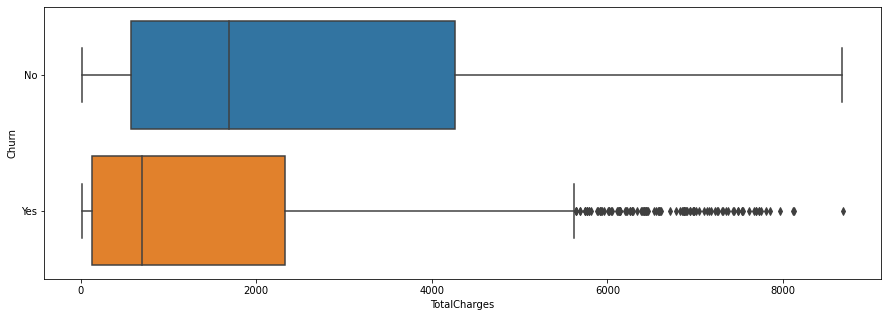

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y= "Churn", data = churn_df)

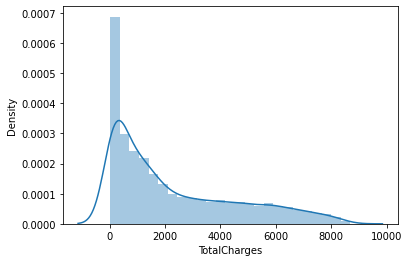

In [12]:
sns.distplot(churn_df["TotalCharges"], hist=True)

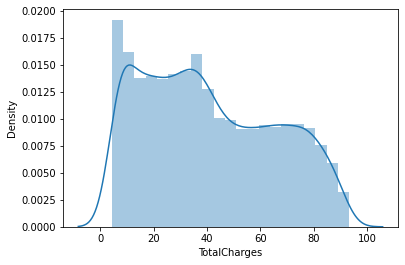

In [13]:
sns.distplot(churn_df["TotalCharges"].apply(np.sqrt), hist=True)

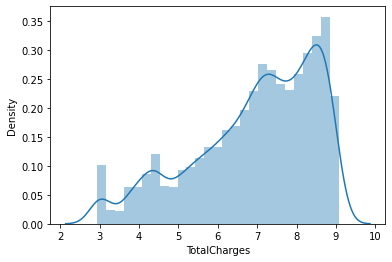

In [14]:
sns.distplot(churn_df["TotalCharges"].apply(np.log), hist=True)

Sqrt is better 

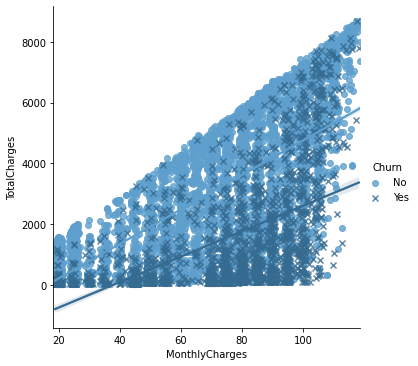

In [15]:
sns.lmplot(x="MonthlyCharges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
           markers = ["o", "x"], 
           palette="Blues_d")

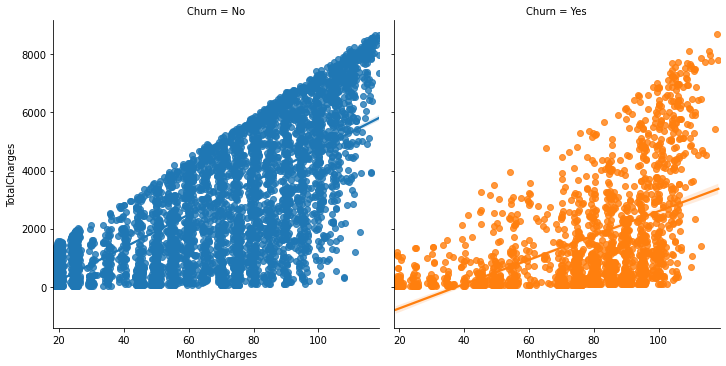

In [16]:
sns.lmplot(x="MonthlyCharges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
          col = "Churn")

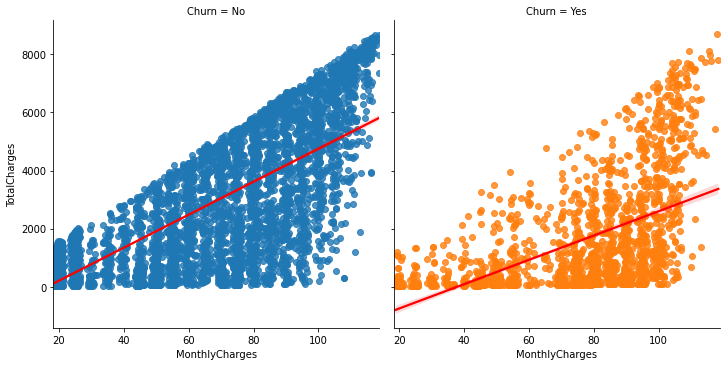

In [17]:
sns.lmplot(x="MonthlyCharges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
          col = "Churn",
           line_kws={'color':'red'})

Weak Linear relationship

In [18]:
churn_df[["MonthlyCharges", "TotalCharges"]].corr() #[-1,1]

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.650964
TotalCharges,0.650964,1.000000


In [19]:
churn_df[churn_df["Churn"] == "No"][["MonthlyCharges", "TotalCharges"]].corr() 

,MonthlyCharges,TotalCharges
MonthlyCharges,1.00000,0.75739
TotalCharges,0.75739,1.00000


In [20]:
churn_no_df = churn_df[(churn_df["Churn"] == "No") & (churn_df["TotalCharges"].isna()==False)]


In [21]:
from scipy import stats 

slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["MonthlyCharges"], churn_no_df["TotalCharges"])

In [22]:
print("Slope ", slope)
print("Intercept ", intercept)
print("r-value ", r_value)
print("p_value ", p_value)
print("error ", std_err)
print("R-Squared ", r_value**2)

Slope  56.73637552696062
Intercept  -922.8160085118097
r-value  0.7573902887184033
p_value  0.0
error  0.6819261867835148
R-Squared  0.5736400494449463


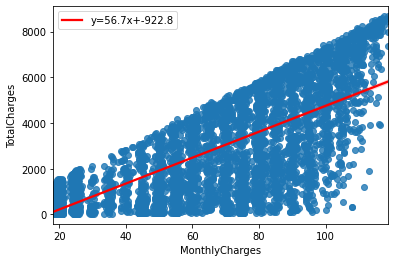

In [23]:
ax = sns.regplot(x="MonthlyCharges",
                 y="TotalCharges",
                 data=churn_no_df,
                 line_kws={"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

Tenure and MonthlyCharges didnt work well.

In [24]:
churn_df["tenure_charges"] = churn_df["tenure"] * churn_df["MonthlyCharges"]

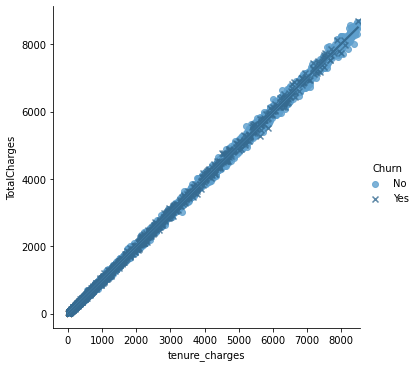

In [25]:
sns.lmplot(x="tenure_charges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
           markers = ["o", "x"], 
           palette="Blues_d")

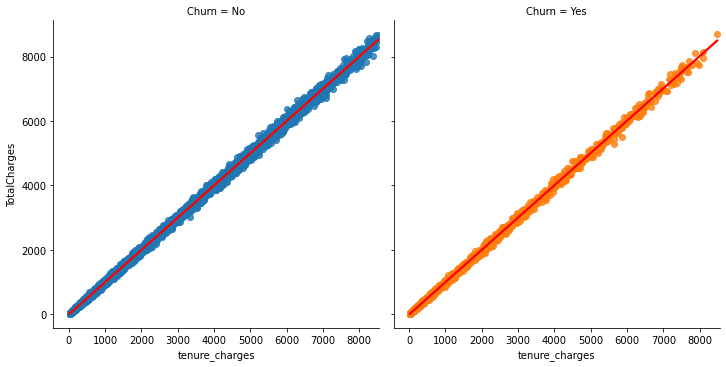

In [26]:
sns.lmplot(x="tenure_charges", 
           y="TotalCharges", 
           data=churn_df, 
           hue="Churn",
           fit_reg=True,  
          col = "Churn",
           line_kws={'color':'red'})

In [27]:
churn_df[["tenure_charges", "TotalCharges"]].corr() 

,tenure_charges,TotalCharges
tenure_charges,1.000000,0.999559
TotalCharges,0.999559,1.000000


In [28]:
churn_df[churn_df["Churn"] == "No"][["tenure_charges", "TotalCharges"]].corr() 

,tenure_charges,TotalCharges
tenure_charges,1.000000,0.999535
TotalCharges,0.999535,1.000000


In [29]:
churn_no_df = churn_df[(churn_df["Churn"] == "No") & (churn_df["TotalCharges"].isna()==False)]

In [30]:
from scipy import stats 

slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["tenure_charges"], churn_no_df["TotalCharges"])

In [31]:
print("Slope ", slope)
print("Intercept ", intercept)
print("r-value ", r_value)
print("p_value ", p_value)
print("error ", std_err)
print("R-Squared ", r_value**2)

Slope  1.0001720821518205
Intercept  -0.3010983695039613
r-value  0.9995350350972924
p_value  0.0
error  0.00042536192429779864
R-Squared  0.9990702863869455


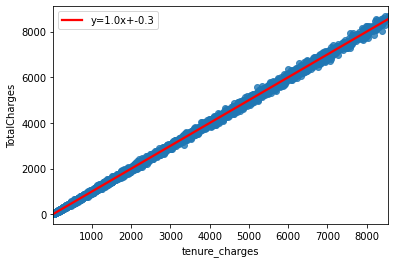

In [32]:
ax = sns.regplot(x="tenure_charges",
                 y="TotalCharges",
                 data=churn_no_df,
                 line_kws={"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

In [33]:
def fillna(tenure, monthlycharge):
  if tenure == 0:
    totalCharges = monthlycharge
  else:
    totalCharges = tenure * monthlycharge
    totalCharges = (slope*totalCharges) + intercept 
  return round(totalCharges, 2)

In [34]:
churn_df["TotalChargeNew"] = churn_df.apply(lambda x: x["TotalCharges"] if not pd.isna(x["TotalCharges"]) else fillna(x["tenure"], x["MonthlyCharges"]), axis=1 )

In [35]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges,TotalChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.40,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,0.00,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,0.00,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,0.00,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,0.00,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.30,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.00,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,0.00,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5980.80,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,357.20,356.96


### Feature Selection - Categorical Variables

Chi Square: 

Null Hypothesis: There is no relationship between two categorical values

Alternate Hypothesis: There is a relationship between the two categorical values

In [36]:
churn_df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

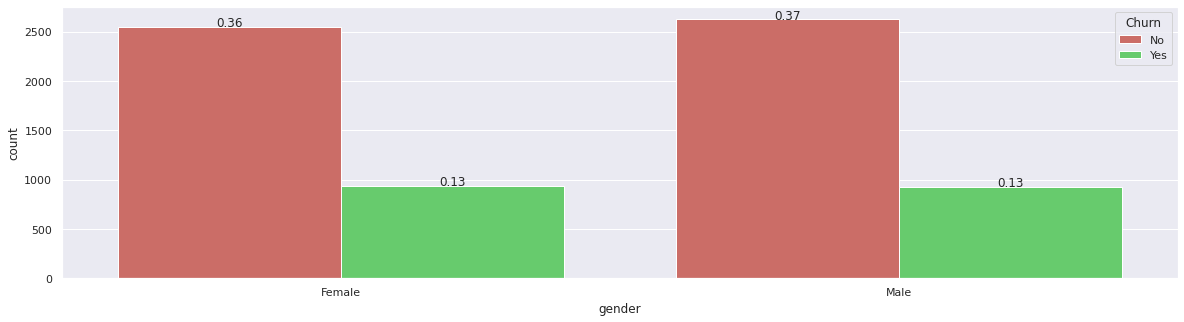

In [37]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)

fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x='gender', hue= "Churn", data= churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha="center")

In [38]:
gender_churn_ct = pd.crosstab(index=churn_df["gender"], columns=churn_df["Churn"])

In [39]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [40]:
from scipy import stats 
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [41]:
chi2

0.4840828822091383

In [42]:
p

0.48657873605618596

In [43]:
dof

1

In [44]:
pd.crosstab(index=churn_df["gender"], columns=churn_df["Churn"], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [45]:
churn_df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

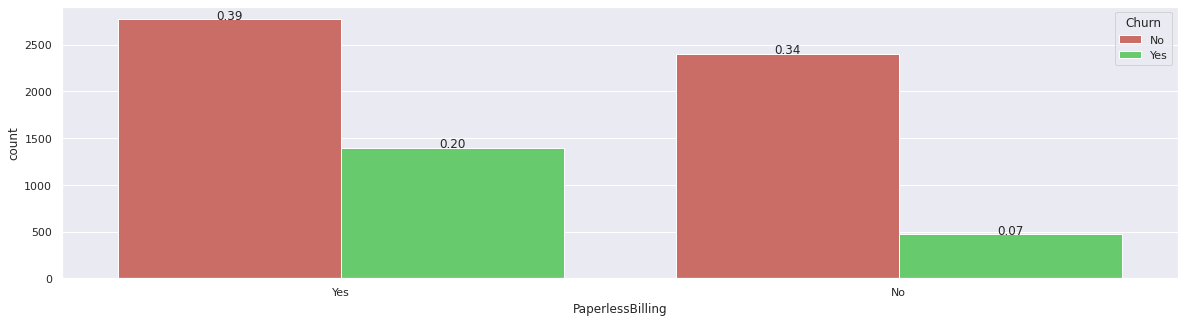

In [46]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)

fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x='PaperlessBilling', hue= "Churn", data= churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha="center")

In [47]:
billing_churn_ct = pd.crosstab(index=churn_df["PaperlessBilling"], columns=churn_df["Churn"])

In [48]:
from scipy import stats 
(chi2, p, dof, _) = stats.chi2_contingency([billing_churn_ct.iloc[0].values, billing_churn_ct.iloc[1].values])

In [49]:
chi2

258.27764906707307

In [50]:
p

4.073354668665985e-58

In [51]:
dof

1

In [52]:
pd.crosstab(index=churn_df["PaperlessBilling"], columns=churn_df["Churn"], margins=True)

Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


### Categorical Variables Correlation

In [53]:
churn_df.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges,tenure_charges,TotalChargeNew
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795,0.103261,0.102975
tenure,0.016567,1.000000,0.508526,0.247900,0.826066,0.826568,0.826177
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768,0.441539,0.441852
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964,0.651566,0.651172
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000,0.999559,1.000000
tenure_charges,0.103261,0.826568,0.441539,0.651566,0.999559,1.000000,0.999561
TotalChargeNew,0.102975,0.826177,0.441852,0.651172,1.000000,0.999561,1.000000


In [54]:
churn_df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

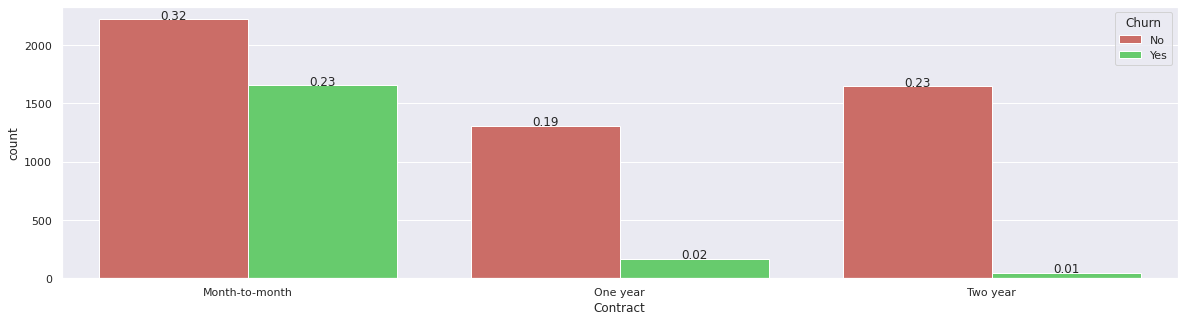

In [55]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)

fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x='Contract', hue= "Churn", data= churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height+3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha="center")

In [56]:
contract_churn_ct = pd.crosstab(index=churn_df["Contract"], columns=churn_df["Churn"])

In [57]:
from scipy import stats 
(chi2, p, dof, _) = stats.chi2_contingency([contract_churn_ct.iloc[0].values, contract_churn_ct.iloc[1].values])

In [58]:
chi2

468.4084443130493

In [59]:
p

7.113840265103799e-104

In [60]:
dof

# No relationship

1

In [61]:
pd.crosstab(index=churn_df["Contract"], columns=churn_df["Churn"], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [62]:
n = churn_df.shape[0]
C = contract_churn_ct.shape[1]
R = contract_churn_ct.shape[0]

cramer_stats = np.sqrt(chi2/(n*(min(C,R)-1)))

In [63]:
cramer_stats

0.2578894130355515

### Correlations

In [64]:
churn_df.cov()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges,tenure_charges,TotalChargeNew
SeniorCitizen,0.135875,0.149978,-0.065837,2.442062,8.418478e+01,8.620257e+01,8.603815e+01
tenure,0.149978,603.168108,24.540114,183.196987,4.591857e+04,4.597421e+04,4.599183e+04
ServiceCount,-0.065837,24.540114,3.860893,2.451449,1.975885e+03,1.964849e+03,1.967926e+03
MonthlyCharges,2.442062,183.196987,2.451449,905.410934,4.434728e+04,4.440152e+04,4.441267e+04
TotalCharges,84.184779,45918.568462,1975.885264,44347.284184,5.132518e+06,5.125697e+06,5.132518e+06
tenure_charges,86.202570,45974.206049,1964.848746,44401.521471,5.125697e+06,5.128999e+06,5.131141e+06
TotalChargeNew,86.038149,45991.834542,1967.926303,44412.674726,5.132518e+06,5.131141e+06,5.137795e+06


In [65]:
churn_df.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges,tenure_charges,TotalChargeNew
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795,0.103261,0.102975
tenure,0.016567,1.000000,0.508526,0.247900,0.826066,0.826568,0.826177
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768,0.441539,0.441852
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964,0.651566,0.651172
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000,0.999559,1.000000
tenure_charges,0.103261,0.826568,0.441539,0.651566,0.999559,1.000000,0.999561
TotalChargeNew,0.102975,0.826177,0.441852,0.651172,1.000000,0.999561,1.000000


In [66]:
churn_df.corr(method="spearman")

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges,tenure_charges,TotalChargeNew
SeniorCitizen,1.000000,0.018556,-0.097589,0.221067,0.106272,0.108620,0.108114
tenure,0.018556,1.000000,0.500568,0.276417,0.889258,0.890039,0.889671
ServiceCount,-0.097589,0.500568,1.000000,0.061477,0.377167,0.373351,0.373878
MonthlyCharges,0.221067,0.276417,0.061477,1.000000,0.638126,0.638321,0.638183
TotalCharges,0.106272,0.889258,0.377167,0.638126,1.000000,0.999610,1.000000
tenure_charges,0.108620,0.890039,0.373351,0.638321,0.999610,1.000000,0.999587
TotalChargeNew,0.108114,0.889671,0.373878,0.638183,1.000000,0.999587,1.000000


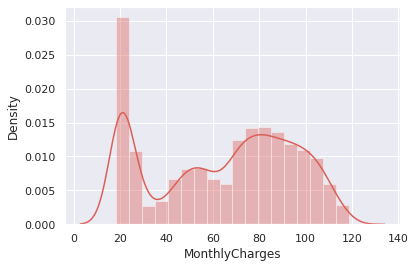

In [70]:
sns.distplot(churn_df["MonthlyCharges"], hist=True)

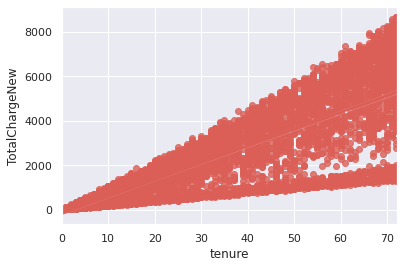

In [73]:
sns.regplot(x = "tenure", y="TotalChargeNew", data=churn_df)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([  18.8 ,   18.85,   18.85, ..., 8670.1 , 8672.45, 8684.8 ])),
 (2103.3385657493054, 2279.797342041744, 0.9275525019519618))

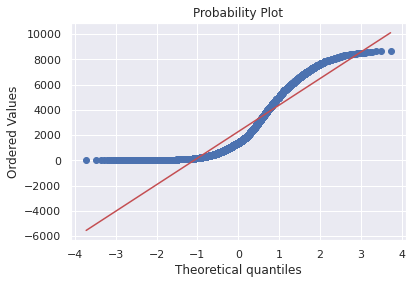

In [74]:
import scipy.stats as stats 
stats.probplot(churn_df["TotalChargeNew"], dist="norm", plot=plt)

#### Non linear functions

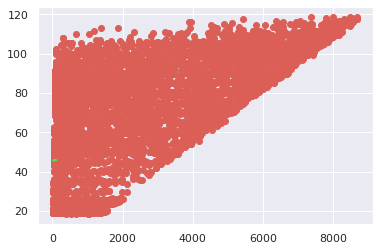

In [106]:
coef = np.poly1d(np.polyfit(churn_df["TotalChargeNew"], churn_df["MonthlyCharges"], 5))

t = churn_df["MonthlyCharges"] 
plt.plot(churn_df["TotalChargeNew"], churn_df["MonthlyCharges"], 'o', t, coef(t), '-')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

poly_feat = PolynomialFeatures(degree=4)
x_poly = poly_feat.fit_transform(<column>)

model = LinearRegression() 
model.fit(x_poly, <cy cols>)


#### Check Normal Distribution

* Distplot
* QQ plot
* Boxplot



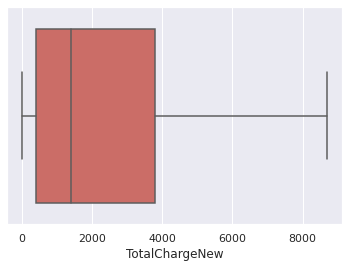

In [89]:
sns.boxplot(x = "TotalChargeNew", data=churn_df)

Null Hypothesis: data came from normal distribution 

Alternate Hypothesis: unlikely data came from normal distribution

In [90]:
stats.anderson(churn_df["TotalChargeNew"], dist="norm")

AndersonResult(statistic=346.7516334940601, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [101]:
from scipy import stats as sm
_, l = sm.boxcox(churn_df["TotalChargeNew"])

In [102]:
print(l)

0.2543164479640237


#### Segmentation

In [75]:
churn_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

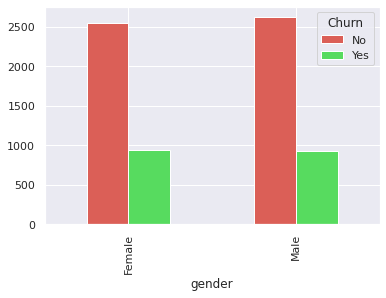

In [77]:
gender_churn_ct.plot.bar()

In [78]:
!pip install pwlf
import pwlf

  Created wheel for pwlf: filename=pwlf-2.0.4-cp37-none-any.whl size=16143 sha256=f120d9d5be726678939a228ff278310ee6a138930472e8e9eeb6423a2d2aee64
  Stored in directory: /root/.cache/pip/wheels/aa/b4/ef/2cb67a24a71a0d9dd93a5ba02f46106e9fa34dd2e3d9d8b4a0
  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp37-none-any.whl size=18178 sha256=95cb14286e04dd473ff731c24dad2ea2673e6c42610057c214d47d44c033ab1d
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pwlf pyDOE


In [80]:
pwlf = pwlf.PiecewiseLinFit(churn_df["MonthlyCharges"], churn_df["TotalChargeNew"],)

In [81]:
pwise_model = pwlf.fit(4)

/usr/local/lib/python3.7/dist-packages/pwlf/pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])
/usr/local/lib/python3.7/dist-packages/pwlf/pwlf.py:1109: RuntimeWarning: divide by zero encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


In [82]:
 pwlf.fit_breaks

array([ 18.25      ,  68.94226743,  68.94999998, 100.33642223,
       118.75      ])

In [83]:
yHat_peicewise = pwlf.predict(churn_df["MonthlyCharges"])

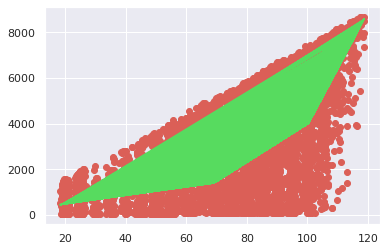

In [84]:
plt.figure()
plt.plot(churn_df["MonthlyCharges"], churn_df["TotalChargeNew"], 'o')
plt.plot(churn_df["MonthlyCharges"], yHat_peicewise, '-')
plt.show()